# Processing data

*By Joe Marcus and Arun Durvasula*

---

Here we process input genotype genotype for the GAN. We're starting with a very small example of ~100 europeans from the HGDP and ~50k ld pruned SNPs to play around. See John Novembre tutorial on population structure for more details on this test dataset ...

https://github.com/NovembreLab/HGDP_PopStruct_Exercise

We are also using a larger dataset of 1577 unrelated individuals from Sardinia to see if the number of indiviudals in the training set improves results ...

http://www.nature.com/ng/journal/v47/n11/full/ng.3368.html

# Imports

In [8]:
%matplotlib inline  

In [9]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Functions

In [12]:
def prepare_data(traw_path):
    '''
    takes in path to the traw file from plink and outputs a 
    standardized genotype matrix as a numpy array
    '''
    # read data
    df = pd.read_table(traw_path)
    
    # convert to matrix
    x = df.drop(['CHR', 'SNP', '(C)M', 'POS', 'COUNTED', 'ALT'], axis=1).as_matrix()
    p = x.shape[0]
    n = x.shape[1]
    print('{} individuals and {} snps'.format(p, n))
    
    # remove any rows with nans
    x = x[~np.isnan(x).any(axis=1)]
    print('removed {} rows from matrix'.format(p - x.shape[0]))
    
    # standardize the genotypes
    z = sk.preprocessing.scale(x)

    return(z)

def run_pca(z):
    '''
    '''
    pca = PCA(n_components=2)
    pca.fit(z.T)
    v = pca.transform(z.T)
    
    return(v)

# Read and clean data

read the hgdp euro data

In [14]:
z_hgdp_euro = prepare_data('../data/H938_Euro.LDprune.traw')

59477 individuals and 124 snps
removed 2 rows from matrix


read the sardinia data

In [11]:
z_sard = prepare_data('../data/Sardinia.1577.unrelated.pruned.traw')

531785 individuals and 1577 snps
removed 0 rows from matrix


/project/jnovembre/jhmarcus/src/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


# Run pca 

visualize the datasets using pca to make sure the input matricies looks sensible

In [15]:
v = run_pca(z_hgdp_euro)

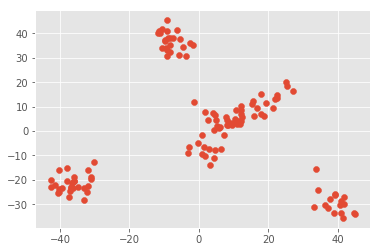

In [16]:
plt.scatter(v[:, 0], v[:, 1])

In [22]:
v = run_pca(z_sard[np.random.choice(z_sard.shape[0], 50000, replace=False)])

this confirms that it looks the same as the run of smartpca in John's tutorial. Lets now run pca on 50k randomly sampled snps for the sardinia data ...

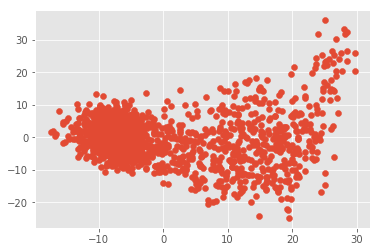

In [23]:
plt.scatter(v[:, 0], v[:, 1])

these results look the same as the demography paper

# Save genotype matricies

lets also subsample the hgdp euro data to 10k rows so we can push it to github. We'll also save the the numpy array for the sardinia data but not push it to github as its technically private data

In [28]:
# set random seed for to sample the same 10k rows
np.random.seed(1990)

In [17]:
z_hgdp_euro_samp = z_hgdp_euro[np.random.choice(z_hgdp_euro.shape[0], 10000, replace=False)] 
np.save('../data/H938_Euro.LDprune.samp', z_hgdp_euro_samp)

In [18]:
np.save('../data/Sardinia.1577.unrelated.pruned', z_sard)